In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [3]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [4]:
C_values=list(np.logspace(-3,3,7)) + [200]
gamma_values=list(np.logspace(-3,3,7)) + ['scale','auto']
param_grid=[
    {
        'kernel': ['rbf','sigmoid','linear'],
        'C': C_values,
        'gamma': gamma_values,
        'epsilon': [1e-2,.1,1],
        'shrinking': [True,False]
    },
    {
        'kernel': ['poly'],
        'C': C_values,
        # 'gamma': gamma_values,
        'degree': [3,4,5],
        'epsilon': [1e-2,.1,1],
        'shrinking': [True,False]
    }
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def train_model(X_train,y_train):
    reg = SVR()
    grid=GridSearchCV(reg,param_grid,cv=5,scoring=make_scorer(r2_score),n_jobs=2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    return grid

In [5]:
model=train_model(X_train,y_train)

{'C': 1000.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}
0.8992065128751452


In [5]:
best_params={'C': 1000.0, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}
reg=SVR(**best_params)
partsMetrics(df,reg)

train rmse: 1.977343879395241
val rmse: 3.2617092165257753
test rmse: 2.559976018648974

train si: 0.16121800544886103
val si: 0.26612331078328516
test si: 0.1839546092306317

train r2: 0.9736714879645605
val r2: 0.9359686855819209
test r2: 0.9680418082585259

train mape: 20.412434019555082
val mape: 44.08924473078963
test mape: 131.6726226103237


In [6]:
allMetrics(df,reg)

all rmse: 1.872440770011894
all si: 0.15065199443300523
all r2: 0.9777554374146583
all mape: 19.095438444579777


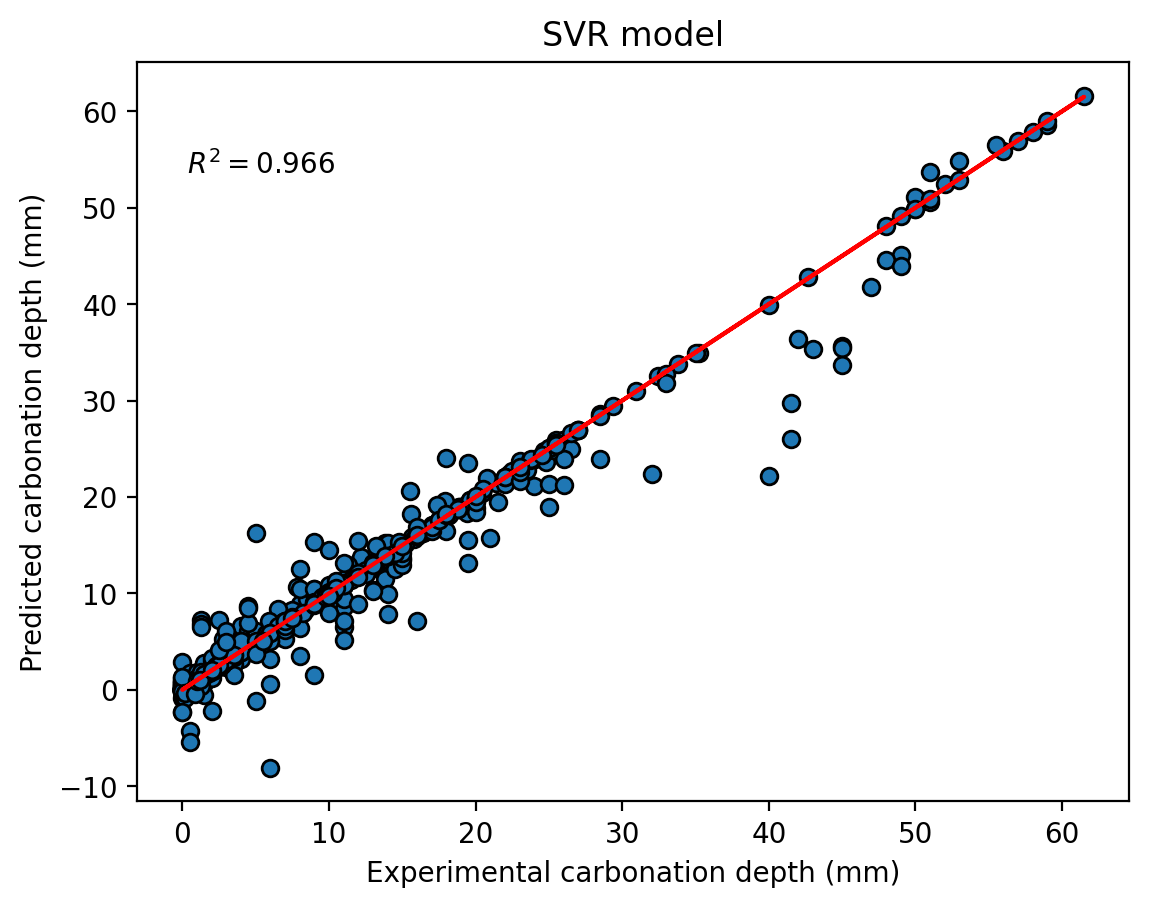

In [7]:
exp_vs_predict(df,reg,'SVR model')